In [1]:
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math as m
import plotly.graph_objs as go
from scipy.stats import norm
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

### Задача_1

In [2]:
def GBM_mean(S0, mu, sigma, N, T, iter): #T - в годах # средняя годовая доходность
    dt = T/N
    t = np.linspace(0, T, N+1)

    mean_E = []
    while iter !=0:
        W = np.random.normal(0, np.sqrt(dt))
        # W = np.random.standard_normal(size=N+1)
        # W = np.random.standard_normal(size=N+1)
        # W = np.cumsum(W) * np.sqrt(dt)  # стандартное броуновское движение
        X = (mu - 0.5 * sigma**2) * t + sigma * W
        S = S0 * np.exp(X) 
        
        mean_E.append(np.mean(S))
        
        iter += -1
        
    E = np.exp(mu*T)*S0
    # delta_E.append(delta_E)
    return abs(np.mean(mean_E) - E)

In [3]:
GBM_mean(S0=1, mu=0.07, sigma=0.9, N=1000, T=1, iter=1000)

0.22305005095423935

[0.03737474656349904, 0.03897299376911012, 0.0417424846966179, 0.045497672461809247, 0.05031705066403003, 0.05626478631214482, 0.06347817840456371, 0.07045689988767978, 0.07919463314624986, 0.08825123381717259, 0.09895599293792778, 0.10856431703806113, 0.12065962390311402, 0.1342544626588016, 0.14885409048409215, 0.160969929104272, 0.17564610876260534, 0.19099762123756625, 0.20743085703827102, 0.222959619676663]


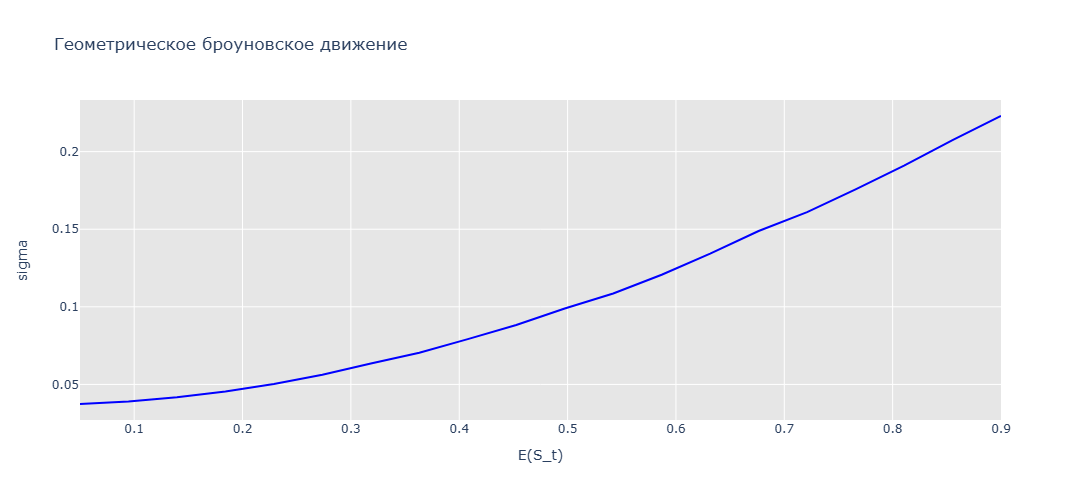

In [4]:
mean = []
arr_sigma = np.linspace(0.05, 0.9, 20)

for i in range(len(arr_sigma)):
    E = GBM_mean(S0=1, mu=0.07, sigma=arr_sigma[i], N=1000, T=1, iter=1000)
    mean.append(E)
    
print(mean)




fig = go.Figure()

fig.add_trace(go.Scatter(x=arr_sigma, y=mean, mode='lines', name='sigma=0.2)',line=dict(color='blue')))

fig.update_layout(
    title='Геометрическое броуновское движение',
    xaxis_title='E(S_t)',
    yaxis_title='sigma',
    width=800,
    height=500,
    # grid=True,
    plot_bgcolor='rgba(128, 128, 128, 0.2)' 
)

fig.show()

---

In [5]:
def GBM0(S0, mu, sigma, N, T): 
    dt = T/N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)  # стандартное броуновское движение

    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X) 

    return t, S



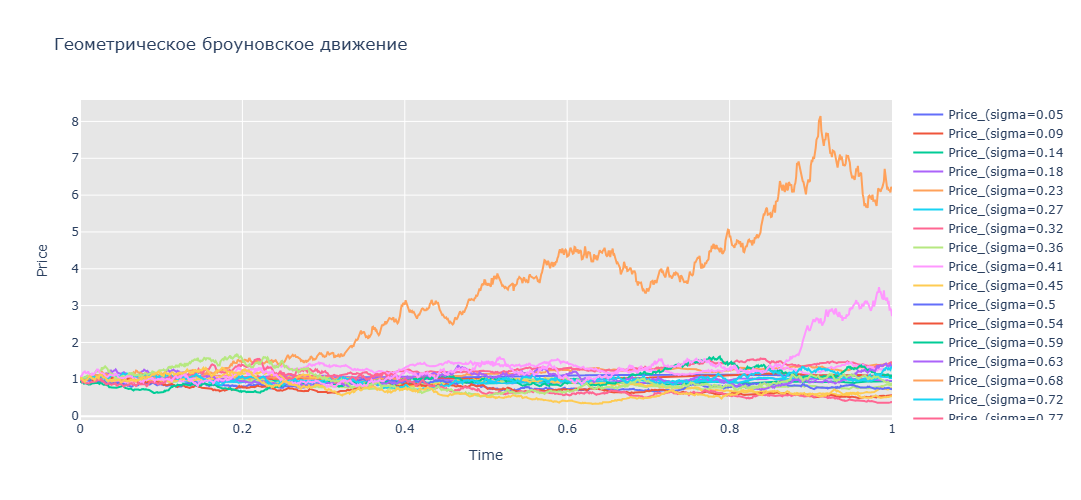

In [6]:
arr_sigma = np.linspace(0.05, 0.9, 20)

fig = go.Figure()

for i in range(len(arr_sigma)):
    t, S = GBM0(S0=1, mu=0.07, sigma=arr_sigma[i], N=1000, T=1)
    
    fig.add_trace(go.Scatter(x=t, y=S, mode='lines', name=f'Price_(sigma={round(arr_sigma[i], 2)}'))


fig.update_layout(
    title='Геометрическое броуновское движение',
    xaxis_title='Time',
    yaxis_title='Price',
    width=800,
    height=500,
    # grid=True,
    plot_bgcolor='rgba(128, 128, 128, 0.2)' 
)

fig.show()

### Задача_2

In [7]:
def с_t_x(S, k, r, sigma, T, t):
    tau = T - t
    if tau <= 0:  # если опцион уже истек, его значение равно нулю или внутренней стоимости
        return max(S - k, 0)

    a_plus = (np.log(S / k) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    a_minus = (np.log(S / k) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    
    call_price = S * norm.cdf(a_plus) - k * np.exp(-r * tau) * norm.cdf(a_minus)
    return call_price


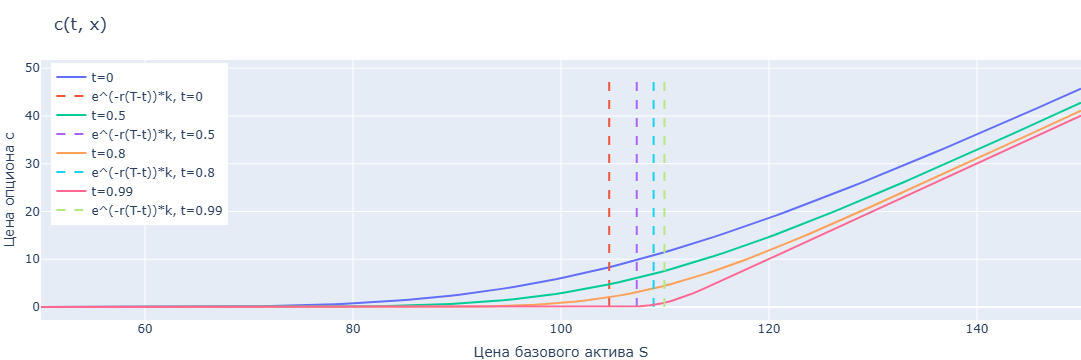

In [8]:

x = 100  # текущая цена актива
k = 110  # цена исполнения (страйк)
r = 0.05 # безрисковая процентная ставка
sigma = 0.2  # волатильность
T = 1  # сок действия опциона
t_values = [0, 0.5 * T, 0.8 * T, 0.99 * T]  
S_values = np.linspace(50, 150, 100)

##########################################

fig = go.Figure()

for t in t_values:
    call_prices = [с_t_x(S, k, r, sigma, T, t) for S in S_values]
    fig.add_trace(go.Scatter(x=S_values, y=call_prices, mode='lines', name=f"t={t}"))

    e_rtK = np.exp(-r * (T - t)) * k
    fig.add_trace(go.Scatter(x=[e_rtK] * 50, y=list(range(0, 50)), mode='lines', line=dict(dash='dash'), name=f"e^(-r(T-t))*k, t={t}"))

# Update layout
fig.update_layout(
    title='c(t, x)',
    xaxis_title='Цена базового актива S',
    yaxis_title='Цена опциона c',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(l=0, r=0, t=60, b=0),
    showlegend=True
)

# Show plot
fig.show()

### Задание_3

In [9]:
def greeks(S0, k, r, sigma, T, t):
    x = np.linspace(500, 1200, 1000)  # Диапазон цен
    tau = T - t
    
    a_plus = (np.log(x / k) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    a_minus = (np.log(x / k) + (r - 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    

   
    
    delta = norm.cdf(a_plus) # производная по x
    gamma = norm.pdf(a_plus) / (x * sigma * np.sqrt(tau)) # вторая производная по x (скорость изменения дельты)
    theta = -r * k * np.exp(-r * tau) * norm.cdf(a_minus) - (sigma * x / (2 * np.sqrt(tau))) * norm.pdf(a_plus) # производная по t ("затухание по времени")
    vega = x * np.sqrt(tau) / np.sqrt(2*np.pi) * np.exp(-0.5 * a_plus**2 ) # производная по sigma (чуствительность к волатильности)

    rho =  k * tau * np.exp(-r * tau) * norm.cdf(a_minus) # производная по K 
    # kappa = -((np.exp(-r * tau)) / (x * sigma * np.sqrt(tau)) * norm.pdf(a_minus)) # производная дельты по x (измеряет мгновенную скорость изменения дельты с течением времени)
    kappa = - np.exp(-r * tau) * norm.pdf(a_minus)
    return x, delta, theta, gamma, vega, rho, kappa




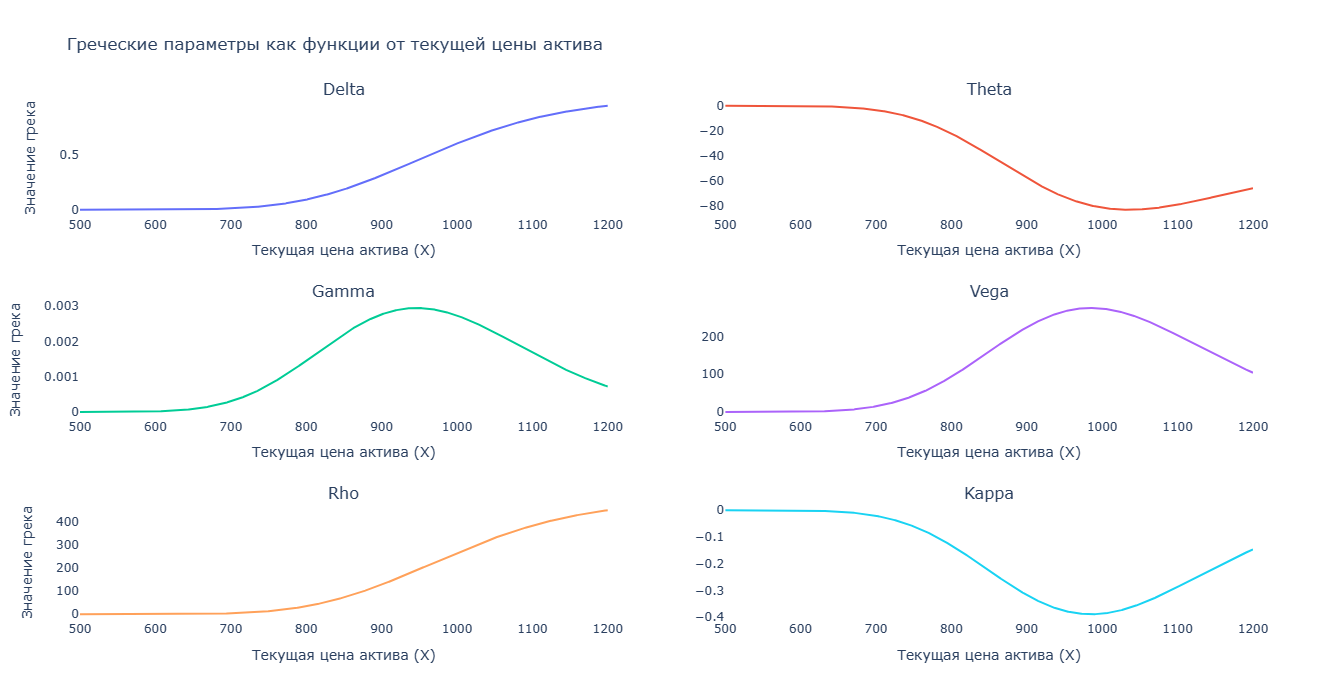

delta - измеряет скорость изменения теоретической стоимости опциона по отношению к изменениям цены базового актива
gamma - измеряет скорость изменения дельты по отношению к изменениям базовой цены
theta - измеряет чувствительность стоимости производной к течению времени: "затухание во времени"
vega - измеряет чувствительность к волатильности
rho - измеряет чувствительность к процентной ставке
kappa - измеряет чувствительность к страйку


In [10]:
S0 = 1000  # Начальная цена актива
k = 1000   # Стоимость исполнения
r = 0.05  # Годовая безрисковая ставка
sigma = 0.2  # Волатильность
T = 1     # Время до исполнения
t = 0.5   # Текущее время


x, delta, theta, gamma, vega, rho, kappa = greeks(S0, k, r, sigma, T, t)

fig = make_subplots(rows=3, cols=2, subplot_titles=('Delta', 'Theta', 'Gamma', 'Vega', 'Rho', 'Kappa'))

fig.add_trace(go.Scatter(x=x, y=delta, mode='lines', name='Delta'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=theta, mode='lines', name='Theta'), row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=gamma, mode='lines', name='Gamma'), row=2, col=1)
fig.add_trace(go.Scatter(x=x, y=vega, mode='lines', name='Vega'), row=2, col=2)
fig.add_trace(go.Scatter(x=x, y=rho, mode='lines', name='Rho'), row=3, col=1)
fig.add_trace(go.Scatter(x=x, y=kappa, mode='lines', name='Kappa'), row=3, col=2)

fig.update_layout(
    title='Греческие параметры как функции от текущей цены актива',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False,
    width=1000,
    height=700
)

for i in range(1, 4):
    fig.update_xaxes(title_text='Текущая цена актива (X)', row=i)
    fig.update_yaxes(title_text='Значение грека', row=i, col=1)

fig.show()

print('delta - измеряет скорость изменения теоретической стоимости опциона по отношению к изменениям цены базового актива')
print('gamma - измеряет скорость изменения дельты по отношению к изменениям базовой цены')
print('theta - измеряет чувствительность стоимости производной к течению времени: "затухание во времени"')
print('vega - измеряет чувствительность к волатильности')
print('rho - измеряет чувствительность к процентной ставке')
print('kappa - измеряет чувствительность к страйку')


### Задача_4

In [39]:
def GBM(S0, r, sigma, T, n):
    dt = T / n
    S = np.zeros(n + 1)
    S[0] = S0
    for t in range(1, n + 1):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)
    return S

def c_t_x(S, K, r, sigma, T, t):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * (T - t)) * norm.cdf(d2)
    return call_price


# Функция для вычисления портфеля X(t)
def portfolio(t, S):
    c = c_t_x(K=K, S=S, r=r, sigma=sigma, T=T, t=t)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    c_x = norm.cdf(d1)
    X = c - c_x * S  # портфель
    return X

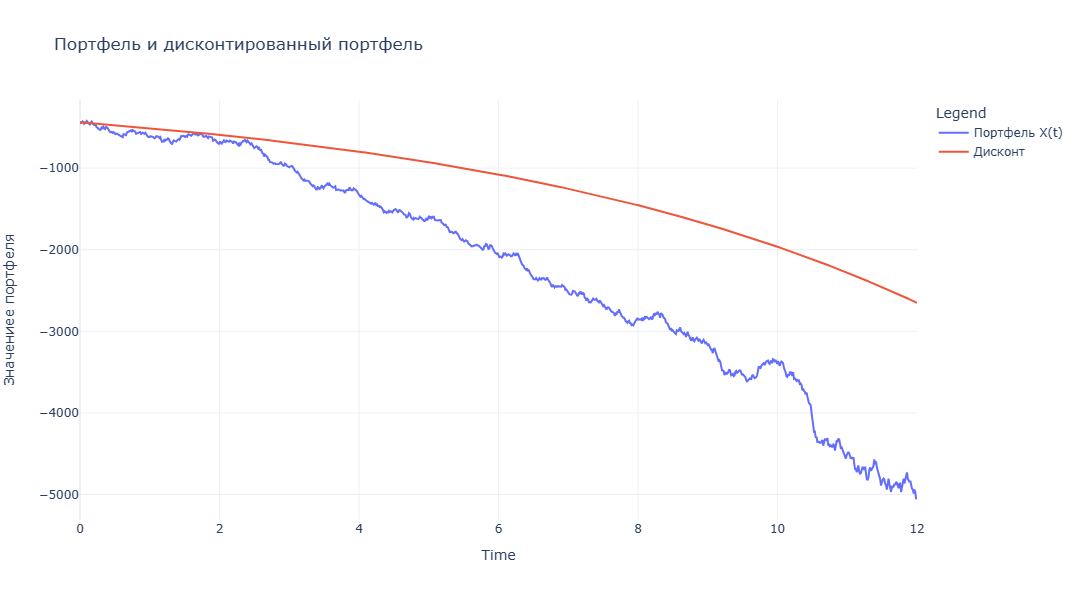

In [63]:

T = 12
n = 1000
r = 0.15
sigma = 0.09
S0 = 1000
K = S0*np.exp(r*T) 

# Заданные точки времени ti
ti = np.linspace(0, T, n+1)

# Моделирование геометрического броуновского движения
S = GBM(S0, r, sigma, T, n)

port = [portfolio(ti[i], S[i]) for i in range(0, n + 1)]
d_port = np.exp(r * ti) * port[0]


# Построение графиков
fig = go.Figure()

fig.add_trace(go.Scatter(x=ti, y=port, mode='lines', name='Портфель X(t)'))
fig.add_trace(go.Scatter(x=ti, y=d_port, mode='lines', name='Дисконт'))

fig.update_layout(
    title='Портфель и дисконтированный портфель',
    xaxis_title='Time',
    yaxis_title='Значениее портфеля',
    legend_title='Legend',
    template='plotly_white',
    width=800,
    height=600,
)

fig.show()

